---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
## Define Hyperparameters
in_img_size = 224
batch_size = 16
num_workers = 8
learning_rate = 0.1
epochs = 5

In [2]:
import os
from torchvision import datasets, transforms
import torch
import matplotlib.pyplot as plt

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

## Import data
#data_dir        = "./data/dogImages/"
data_dir        = "./data/dog/"
train_data_dir  = os.path.join(data_dir, "train/")
valid_data_dir  = os.path.join(data_dir, "valid/")
test_data_dir   = os.path.join(data_dir, "test/")

data_transform  = transforms.Compose([
        transforms.Resize((in_img_size,in_img_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

train_data  = datasets.ImageFolder(train_data_dir, transform= data_transform)
valid_data  = datasets.ImageFolder(valid_data_dir, transform= data_transform)
test_data   = datasets.ImageFolder(test_data_dir,  transform= data_transform)

total_data = len(train_data) + len(valid_data) + len(test_data)
print("Total No. of Data      : ", total_data)
print("Num of Training Data   : ", len(train_data), "({:2.2%})".format(len(train_data)/total_data))
print("Num of Validation Data : ", len(valid_data), "({:2.2%})".format(len(valid_data)/total_data))
print("Num of Test Data       : ", len(test_data), "({:2.2%})".format(len(test_data)/total_data))

loaders = {
    "train": torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True),
    "valid": torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=False),
    "test" : torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=False)
}

## TODO Explore data
train_classes = train_data.classes
valid_classes = valid_data.classes
test_classes = test_data.classes
print("Num of train classess: ", len(train_classes))
print("Num of valid classess: ", len(valid_classes))
print("Num of test classess : ", len(test_classes))

print("Input image size: ", train_data[0][0].size())


Total No. of Data      :  722
Num of Training Data   :  578 (80.06%)
Num of Validation Data :  71 (9.83%)
Num of Test Data       :  73 (10.11%)
Num of train classess:  10
Num of valid classess:  10
Num of test classess :  10
Input image size:  torch.Size([3, 224, 224])


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [3]:
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN

        self.pool   = nn.MaxPool2d(2,2)

        #in: 224,224,3
        self.conv1  = nn.Conv2d(3,16,3,padding=1) #in_channel, out_channel, kernal_size, stride, padding
        #in: 112,112,16 (after maxpool)
        self.conv2  = nn.Conv2d(16,32,3,padding=1) #in_channel, out_channel, kernal_size, stride, padding
        #in: 56,56,32 (after maxpool)
        self.conv3  = nn.Conv2d(32,64,3,padding=1) #in_channel, out_channel, kernal_size, stride, padding
        #in: 28,28,64 (after maxpool)
        self.fc1    = nn.Linear(28*28*64, 500)
        self.fc2    = nn.Linear(500,133)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 28*28*64)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

use_cuda = torch.cuda.is_available()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_scratch = Net().to(device)
summary(model_scratch, (3, in_img_size, in_img_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
         MaxPool2d-2         [-1, 16, 112, 112]               0
            Conv2d-3         [-1, 32, 112, 112]           4,640
         MaxPool2d-4           [-1, 32, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          18,496
         MaxPool2d-6           [-1, 64, 28, 28]               0
           Dropout-7                [-1, 50176]               0
            Linear-8                  [-1, 500]      25,088,500
           Dropout-9                  [-1, 500]               0
           Linear-10                  [-1, 133]          66,633
Total params: 25,178,717
Trainable params: 25,178,717
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 13.79
Params size (MB): 96.05
Est

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [4]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=learning_rate)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

  0%|          | 0/5 [00:00<?, ?it/s]Epoch: 1 	Training Loss: 2.438027 	Validation Loss: 2.613266
Validation loss decreased (inf --> 2.613266).  Saving model ...
 80%|████████  | 4/5 [02:29<00:36, 36.36s/it]Epoch: 4 	Training Loss: 2.324866 	Validation Loss: 7.020755
Epoch: 5 	Training Loss: 3.263634 	Validation Loss: 2.550337
Validation loss decreased (2.613266 --> 2.550337).  Saving model ...
100%|██████████| 5/5 [03:07<00:00, 37.53s/it]


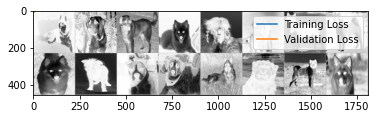

In [9]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import numpy as np
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, model_summary):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 

    #########################
    ## Prepare for Summary ##
    #########################
    # Create folder to write summary data
    writer = SummaryWriter(model_summary)

    #get some random images
    dataitr = iter(loaders["train"])
    images, labels = dataitr.next()

    # create grid of images
    img_grid = torchvision.utils.make_grid(images)

    #show images
    #matplotlib_imshow(img_grid, one_channel=True)

    # write to tensorboard
    writer.add_image('Dog Classifier', img_grid)
    #########################

    running_loss_train = []
    running_loss_valid = []

    for epoch in tqdm(range(1, n_epochs+1)):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            output = model_scratch(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += ((1/(batch_idx + 1)) * (loss.data - train_loss))
            # running_loss_train += loss.item()
            # if batch_idx % 10 == 9:
            #     writer.add_scalar('training_loss', running_loss_train/10, epoch * len(loaders['train']) + batch_idx) 
            #     running_loss_train = 0.0

        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model_scratch(data)
            loss = criterion(output, target)
            valid_loss += ((1/(batch_idx + 1)) * (loss.data - valid_loss))
            # running_loss_valid += loss.item()
            # if batch_idx % 10 == 9:
            #     writer.add_scalar('validation_loss', running_loss_valid/10, epoch * len(loaders['valid']) + batch_idx) 
            #     running_loss_valid = 0.0

        writer.add_scalar('training_loss',   train_loss, epoch * len(loaders['valid'])) 
        writer.add_scalar('validation_loss', valid_loss, epoch * len(loaders['valid'])) 
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        running_loss_train.append(train_loss)
        running_loss_valid.append(valid_loss)

        # ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss

    writer.close()
    # return trained model

    return model, [running_loss_train, running_loss_valid]


# train the model
model_scratch, running_loss = train(epochs, loaders, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt', 'log')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))


plt.plot(running_loss[0], label='Training Loss')
plt.plot(running_loss[1], label='Validation Loss')
plt.legend()
plt.show()


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [10]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.620721


Test Accuracy: 10% ( 8/73)


%reload_ext tensorboard

%load_ext tensorboard
%tensorboard --logdir ./dogClassifierSummary/